In [1]:
import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web
print("The version of tidy3d is:", td.__version__, "(important to match the version with the GUI version on the website.)")


The version of tidy3d is: 2.5.0 (important to match the version with the GUI version on the website.)


In [ ]:
# Simulation spacial parameters
#! The length scale is in microns
side_length = 9.0
grid_size = 50e-3

# Apply a PML in all directions.
boundary_spec = td.BoundarySpec.all_sides(boundary=td.PML())

# Wavelength and resolution parameters
lambda0 = 1.0 # microns
freq0 = td.C_0 / lambda0
fwidth = freq0 / 50
run_time = 200 / freq0


### Define the objects present in our simulation, the source and monitor.

In [ ]:
# Then, define a dipole source at the origin pointing in the z direction.
dipole_source = td.PointDipole(
    center=(0,0,0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization='Ez',
    name='dipole'
)

# And define monitor to measure fields in xz plane at the central frequency.
monitor = td.FieldMonitor(
    center=(0,0,0),
    size=(td.inf, 0, td.inf),
    freqs=[freq0],
    name="freq_domain"
)


### And then put everythin in a Simulation object, which contains all of the spec needed to run the simulation.

In [ ]:
# Define simulation.
simulation = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=boundary_spec,
)

In [ ]:
# Run simulation
sim_data = web.run(simulation, task_name='lecture01_dipole', path='data/data_dipole.hdf5')


16:39:04 CST Created task 'lecture01_dipole' with task_id                       
             'fdve-bd655184-cb9b-4c77-bd79-e759674bce9c' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=891852;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bd655184-cb9b-4c77-bd79-e759674bce9c\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=281397;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bd655184-cb9b-4c77-bd79-e759674bce9c\taskId]8;;\]8;id=891852;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bd655184-cb9b-4c77-bd79-e759674bce9c\=]8;;\]8;id=604448;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bd655184-cb9b-4c77-bd79-e759674bce9c\fdve]8;;\]8;id=891852;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bd655184-cb9b-4c77-bd79-e759674bce9c\-bd655184-cb9]8;;\
             ]8;id=891852;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bd655184-cb9b-4c77-bd79-e759674bce9c\b-4c77-bd79-e759674bce9c']8;;\.

/Users/inhwankim/.local/lib/python3.10/site-packages/rich/live.py:229: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

16:39:05 CST status = success

16:39:06 CST loading simulation from data/data_dipole.hdf5

## Post run analysis

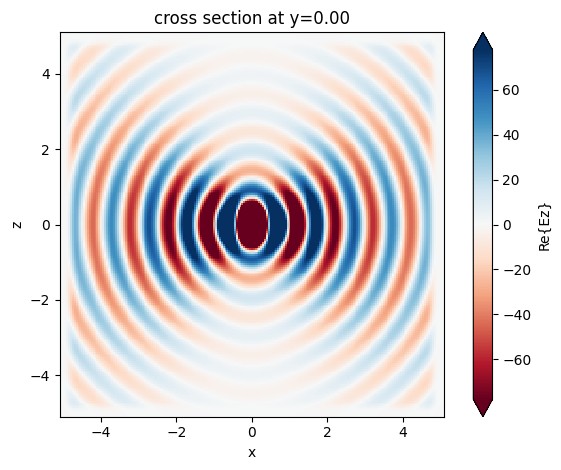

In [ ]:
# check that frequency domain fields look good
ax = sim_data.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()

## More complexity
Let's add a few dielectric box objects to see how that changes the result.

In [ ]:
# define the boxes
epsilon_box = 7
center_offset_box = 1.6
size_box = 1.8
medium=td.Medium(permittivity=epsilon_box,name='medium')

box_top = td.Structure(
    geometry=td.Box(
        center=(0, 0, center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box top',
)

bot_bot_r = td.Structure(
    geometry=td.Box(
        center=(+center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box bottom right',
)

bot_bot_l = td.Structure(
    geometry=td.Box(
        center=(-center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box bottom left',
)

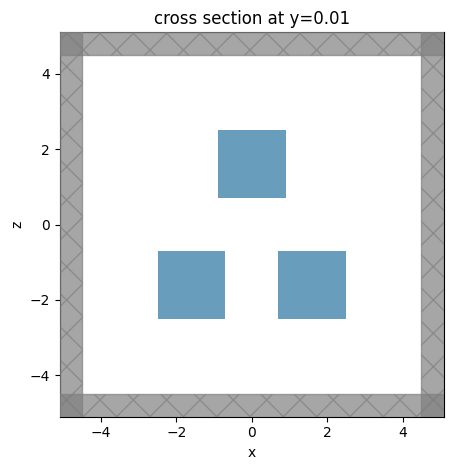

In [ ]:
# make a new simulation with the boxes added
simulation_boxes = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[box_top, bot_bot_r, bot_bot_l],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=boundary_spec,
)

# visualize the simulation first, before running
ax = simulation_boxes.plot(y=0.01)
plt.show()

In [ ]:
# run simulation
sim_data_boxes_2 = web.run(simulation_boxes, task_name='lecture01_several_box_si', path='data/data_several_box.hdf5')

16:46:50 CST Created task 'lecture01_several_box_si' with task_id               
             'fdve-2d637837-80f5-4bb6-8b2a-ba613af69400' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=577450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=739273;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\taskId]8;;\]8;id=577450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\=]8;;\]8;id=934948;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\fdve]8;;\]8;id=577450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\-2d637837-80f]8;;\
             ]8;id=577450;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\5-4bb6-8b2a-ba613af69400']8;;\.

16:46:52 CST status = queued

16:46:56 CST status = preprocess

16:47:02 CST You are running this simulation for FREE. Your current plan allows 
             up to 20 free non-concurrent simulations per day (under 100.0M grid
             points and 50.0K time steps)

             starting up solver

             running solver

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

16:47:18 CST status = postprocess

16:47:23 CST status = success

             View simulation result at                                          
             ]8;id=902504;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=123718;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\taskId]8;;\]8;id=902504;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\=]8;;\]8;id=63824;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\fdve]8;;\]8;id=902504;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\-2d637837-80f]8;;\
             ]8;id=902504;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d637837-80f5-4bb6-8b2a-ba613af69400\5-4bb6-8b2a-ba613af69400']8;;\.

16:47:25 CST loading simulation from data/data_several_box.hdf5

             WARNING: Simulation final field decay value of 0.000859 is greater 
             than the simulation shutoff threshold of 1e-05. Consider running   
             the simulation again with a larger 'run_time' duration for more    
             accurate results.                                                  

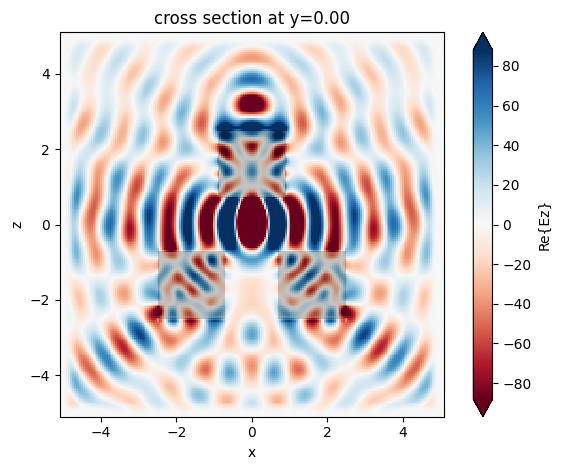

In [ ]:
ax = sim_data_boxes.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()

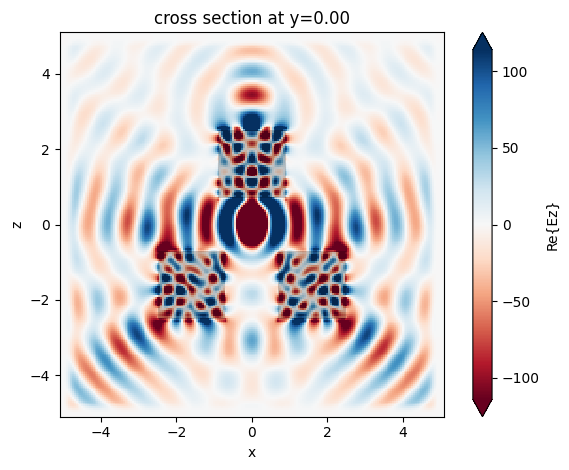

In [ ]:
ax = sim_data_boxes_2.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()